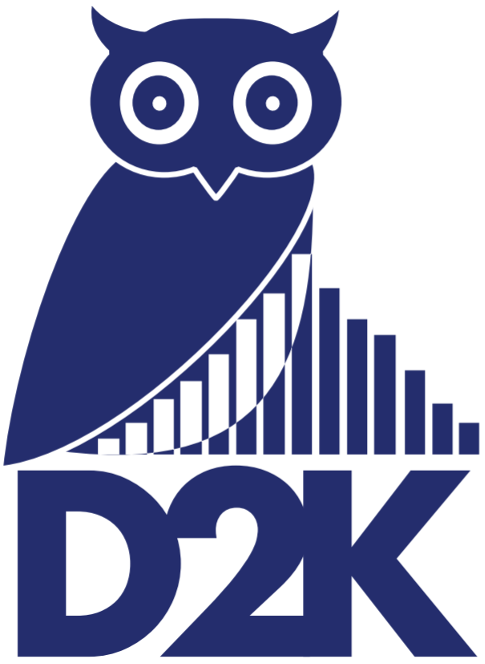 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

### Code Demo for Week 14 ###

# Clustering

In this demo we will explore K-Means Clustering then apply PCA and clustering to a real dataset.
- [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True

import seaborn as sns
# import the cluster model class from sklearn
from sklearn import cluster

np.random.seed(2024)

## K-means
Let us begin with a toy dataset with three groups that are completely separated with the variables given. There are the same number of points per group and the same variance within each group.

In [ ]:
# generate 3 clusters from standard normal
# each cluster has 25 data points
# data is 2 dimensional for visual purposes

# this cluster is centered at (0, 0)
c1 = np.array([0, 0]) + np.random.normal(size=(25, 2))
# this cluster is centered at (2, 8)
c2 = np.array([2, 8]) + np.random.normal(size=(25, 2))
# this cluster is centered at (8, 4)
c3 = np.array([8, 4]) + np.random.normal(size=(25, 2))

x1 = np.vstack((c1, c2, c3)) # stack vertically
print(x1.shape) # final dataset dimension is 75 by 2

# scatter plot to show two numerical variables
sns.scatterplot(x=x1[:, 0], y=x1[:, 1]);

Running the K-Means algorithm, we can see that it is able to accurately pick out the three initial clusters. 

In [ ]:
# from model class, call KMeans, 
# specify hyper-parameter n_clusters
# fit model to data: feature matrix only
kmeans = cluster.KMeans(n_clusters=3, random_state=2024)
kmeans_results = kmeans.fit(x1)
# same scatter plot but color coded by cluster labels: kmeans.labels_
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], hue=kmeans_results.labels_)
# also plot cluster centroids
sns.scatterplot(kmeans_results.cluster_centers_[:, 0], 
                kmeans_results.cluster_centers_[:, 1], 
                color='blue', marker='x', s=100, linewidth=2);

In the previous example, the K-Means algorithm was able to accurately find the three initial clusters. However, changing the starting centers for K-Means can change the final clusters that K-Means gives us. Change the initial centers to the points `[0, 1]`, `[1, 1]`, and `[2, 2]`; and fit a [`cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) again. Keep the same `random_state` parameter and the `n_clusters` parameter as 3.

**Practice:**
Let's try some other simulated datasets. 

- Fit `cluster.KMeans` objects on the simulated datasets.
- Try with different number of clusters respectively. 

If you didn't know how data was generated, and only based on the scatter plot above, how many clusters do you think is there?

In [ ]:
# generate 3 clusters from bivariate normal 
# each cluster has 100 data points
# data is 2 dimensional for visual purposes

# this cluster is centered at (-3, 0)
c1 = np.random.multivariate_normal([-3,0], [[.5,0],[0,4]], 100)
# this cluster is centered at (3, 0)
c2 = np.random.multivariate_normal([3,0], [[.5,0],[0,4]], 100)
# this cluster is centered at (0, 6)
c3 = np.random.multivariate_normal([0,6], [[4,0],[0,.5]], 100)
x2 = np.vstack((c1, c2, c3))# stack vertically
print(x2.shape) # final dataset dimension is 300 by 2

sns.scatterplot(x=x2[:, 0], y=x2[:, 1]);

In [ ]:
np.random.seed(2023)
# generate two really unbalanced clusters
c1 = 0.5*np.random.normal(size=(25, 2))
c2 = np.array([10, 10]) + 3*np.random.normal(size=(475, 2))

x3 = np.vstack((c1, c2))
# see how they look like:
sns.scatterplot(x=x3[:, 0], y=x3[:, 1]);

In [ ]:
### your code here
...

Sometimes, K-Means will have a difficult time finding the "correct" clusters even with ideal starting centers. For example, consider the last simulated data: There are two groups of different sizes in two different senses. The smaller group has both smaller variability and is less numerous, and the larger of the two groups is more diffuse and populated.

(For notational simplicity we will call the initial cluster on the bottom left $A$ and the initial cluster on the top right $B$. We will call the bottom left cluster found by K-Means as cluster $a$ and the top right cluster found by K-Means as cluster $b$.) 

As seen below, K-Means is unable to find the two intial clusters because cluster $a$ includes points from cluster $B$. Recall that K-Means attempts to minimize distortion, so it makes sense that points in the bottom left of cluster $B$ would prefer to be in cluster $a$ rather than cluster $b$. If these points were in cluster $b$ instead, then the resulting cluster assignments would have a larger distortion.

## Clustering with real data

In the previous examples, we looked at clustering on 2 dimensional datasets (easier to visualize). However, we can easily use clustering on data which have more than 2 dimensions. For this, let us turn to a World Bank dataset, containing various features for the world's countries.

This data comes from https://databank.worldbank.org/source/world-development-indicators#.


**Practice:**
- Read in the data from `world_bank_data.csv`, and set index_col='country' inside the `read_csv` function.
- Check data shape, column names and data types, and missing values.
- Instead of dropping rows with missing values, which is going to cut the number of rows by more than half, we will fill in all missing values in numerical columns with zero, for the sake of convenience.
- Before applying any algorithm to the data, please standardize each column by subtracting the column mean, and dividing by column standard deviation. 
    - The reason we want to do this is because the columns are on very different scales: for example, in this data, statistics like population will completely dominate features like % of total population that live in urban areas. This is because population can range over billions whereas % is always between 0 and 100. If the algorithm is based on some distance measure or variation, which are unit-dependent, the variables with large scales and units will dominate the result. The ultimate effect is that we're not really using most of our columns at all. 
    - [`df.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
    - [`df.std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)
- Our goal is to apply K-means algorithm to cluster all the countries. Before we apply a clustering algorithm, the most important question is: how many clusters? A first step would be take a look at the entire dataset and see if there is any clear patterns. How do we do that?
    - think about how we would be able to visualize the entire dataset and "see" the number of clusters. Notice the data has way too many columns to plot all at once!
    - based on your visualization, decide the number of clusters and implement K-means.
    - interpretation of the clusters: looking at the countries being clustered together, can you make sense of the clusters?
        - how do you see the country names for a particular cluster? Remember the we set the country as index!
        - some hints as interpretation: big vs. small countries in terms of area and population; developed vs. developing countries in terms of economics, etc.
- Lastly, recreate your visualization of the entire dataset, and color code the points with cluster membership to visualize the different clusters.

In [ ]:
### your code here
...